In [1]:
from recovering_gaussians import *
import numpy as np

import sympy as sp

In [2]:
a_sym, b_sym, c_sym = sp.symbols('a b c')

cov_matrix_sym = sp.Matrix([
    [a_sym, 0, c_sym, 0],
    [0, a_sym, 0, -c_sym],
    [c_sym, 0, b_sym, 0],
    [0, -c_sym, 0, b_sym]]
)

cov_matrix = np.array(cov_matrix_sym.subs({a_sym: 1, b_sym: 1.2, c_sym: 0.4})).astype(np.float64)

cov_matrix

array([[ 1. ,  0. ,  0.4,  0. ],
       [ 0. ,  1. ,  0. , -0.4],
       [ 0.4,  0. ,  1.2,  0. ],
       [ 0. , -0.4,  0. ,  1.2]])

In [3]:
data = generate_data_4D(cov_matrix)

marginals = calculate_4D_marginals(data)

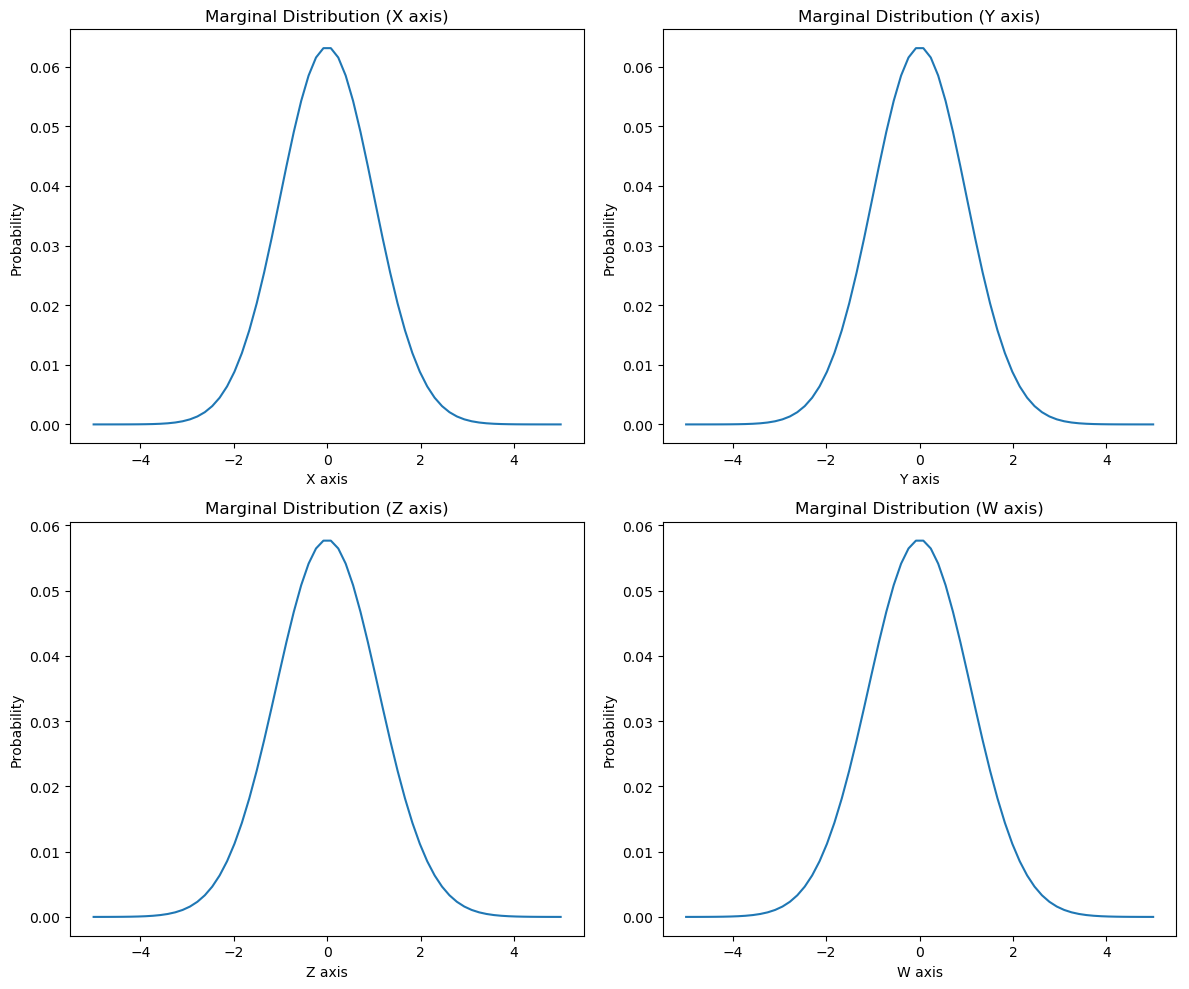

In [4]:
plot_4D_data(marginals["x"]["marginal"], marginals["y"]["marginal"], marginals["z"]["marginal"], marginals["w"]["marginal"])

In [5]:
print(marginals["x"]["mean"], marginals["y"]["mean"], marginals["z"]["mean"], marginals["w"]["mean"])
print(marginals["x"]["variance"], marginals["y"]["variance"], marginals["z"]["variance"], marginals["w"]["variance"])

-3.1821333762449555e-17 -6.04103897981767e-18 3.909057051578596e-16 -1.818223983917136e-16
0.9999797239237623 0.9999797239237622 1.1999047540791228 1.1999047540791046


In [6]:
# Generate recovered covariance matrix
index_to_key = {0: 'x', 1: 'y', 2: 'z', 3: 'w'}
recovered_cov_matrix = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        if j == i:
            recovered_cov_matrix[i, j] = marginals[index_to_key[i]]["variance"]
            continue

        recovered_cov_matrix[i, j] = calculate_4D_covariance_element(data, marginals, i, j)

print(np.round(recovered_cov_matrix, 3))

[[ 1.   0.   0.4 -0. ]
 [ 0.   1.   0.  -0.4]
 [ 0.4  0.   1.2 -0. ]
 [-0.  -0.4 -0.   1.2]]


In [7]:
print(np.round(cov_matrix, 3))

[[ 1.   0.   0.4  0. ]
 [ 0.   1.   0.  -0.4]
 [ 0.4  0.   1.2  0. ]
 [ 0.  -0.4  0.   1.2]]
